In [9]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import string

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("~/GIT/nlp-in-python-tutorial/jira.csv")
pd.set_option('max_colwidth',150)
df = df.drop(['Issue Type', 'Issue id', 'Parent id', 'Sprint'] , axis=1)
df

,Issue key,Summary
0,OP-24110,unable to access https://password.corp.cyren.com while using fortigate site Ber1
1,OP-24109,Open a ticket in NTT + GTT update them on advertising new Public subnet
2,OP-24108,Build SDN tutorial
3,OP-24107,Add new user Penny Goldstein to forticlient
4,OP-24106,Investigate the C9-C21 connection
...,...,...
855,OP-10996,please create 2 vips for webnode log file relays
856,OP-10612,LVS public IP in front of saas-logs edge nodes
857,OP-9447,Implement monitoring for microsoft hosted hosts and vpn
858,OP-9446,Define monitoring for microsoft hosted hosts and vpn


In [73]:
# Define Apply all cleaning techniques
def clean_index_round0(text):
    '''Removes OP- from Issue number'''
    text = re.sub('OP-', '', text)
    return text
round0 = lambda x: clean_index_round0(x)

# Apply a first round of text cleaning techniques
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\d', '', text)
    text = re.sub('\ [0-9]+\ ', '', text)
    text = re.sub(']', '', text)
    return text
round1 = lambda x: clean_text_round1(x)

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
round2 = lambda x: clean_text_round2(x)

data_clean = pd.DataFrame({'Jira': df['Issue key'].apply(round0), 'Summary': df.Summary.apply(round1)})
data_clean = pd.DataFrame({'Jira': data_clean.Jira, 'Summary': data_clean.Summary.apply(round2)})
data_clean = data_clean.set_index('Jira')
data_clean

,Summary
Jira,
24110,unable to access httpspasswordcorpcyrencom while using fortigate site
24109,open a ticket in ntt gtt update them on advertising new public subnet
24108,build sdn tutorial
24107,add new user penny goldstein to forticlient
24106,investigate the connection
...,...
10996,please create vips for webnode log file relays
10612,lvs public ip in front of saaslogs edge nodes
9447,implement monitoring for microsoft hosted hosts and vpn


In [74]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [90]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

# cv = CountVectorizer(stop_words='english')
# data_cv = cv.fit_transform(data_clean.Summary)
# data_cv.toarray()
# data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_dtm.index = data_clean.index
# data_dtm
#?WordCloud

In [105]:
all_words = combine_text(data_clean.Summary)
all_words

nltk.download('stopwords')

cyren_stopwords = [
    'please',
    'to',
    'new',
    'please',
    'for'
]

main_stopwords = stopwords.words('english') + cyren_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evgenys/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


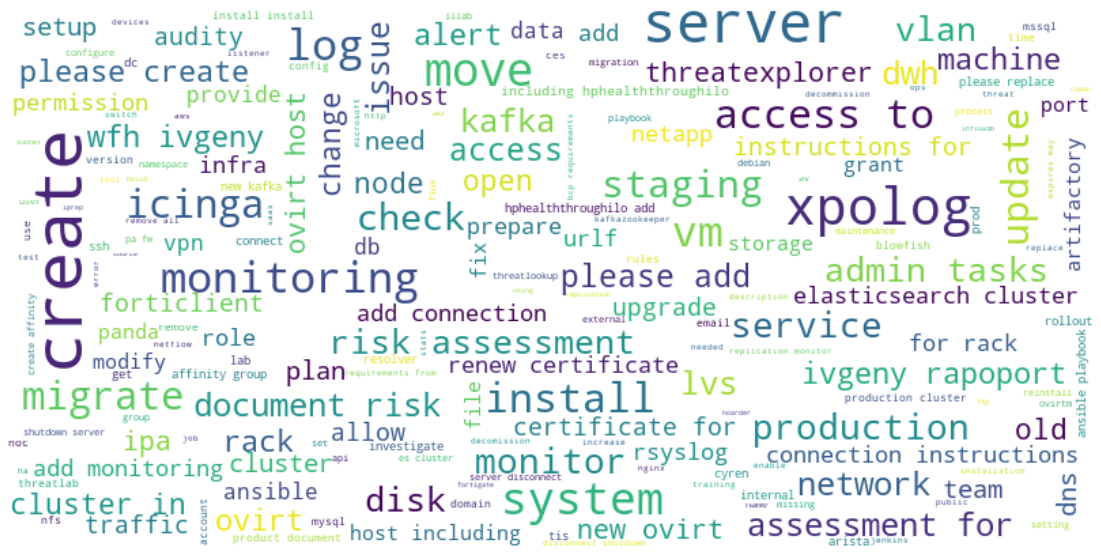

In [110]:
wordcloud = WordCloud(
    max_font_size=50, 
    max_words=200, 
    background_color="white",
    width=800,
    height=400,
    stopwords=main_stopwords).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("/Users/evgenys/Downloads/jira_buzz.png")